In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from Processing.preprocessing import determine_variables_types, find_outliers, identify_missing_variables, imputation_missing_val

In [16]:
# limit the size of temporary arrays
set_config(working_memory=64)

In [17]:
# upload the dataset
df_final = pd.read_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\final_tab.csv')

In [18]:
# code created by chatGPT
df_final = df_final[df_final["temporal_split"].isin(["train_era", "test_era"])].copy()

In [19]:
# create a copy
df_final_c = df_final.copy()

In [20]:
# remove some of the variables
cols_to_delete = ['subject_id', 'hadm_id', 'stay_id', 'icu_intime', 'icu_outtime', 'icu_los_days', 'admittime', 'dischtime', 'deathtime', 'icu_24h_end', 'hospital_expire_flag', 'anchor_year_group', 'admission_location', 'discharge_location', 'first_careunit', 'last_careunit']
df_final_c = df_final_c.drop(columns=cols_to_delete)

In [21]:
# Categorize the variables between numerical, categorical, and binary
dictionary_df = determine_variables_types(df = df_final_c, y = 'in_hosp_mortality')

In [22]:
# Extract continuous variables 
continuous_var = dictionary_df['continuous']
# Define categorical and binary variables
categorical_var = dictionary_df['categorical']
binary_var = dictionary_df['binary']

In [28]:
# remove temporal_split
categorical_var

['temporal_split',
 'sex',
 'race',
 'insurance',
 'marital_status',
 'admission_type']

In [23]:
df_final_c

,in_hosp_mortality,anchor_year,temporal_split,age,sex,race,insurance,marital_status,admission_type,charlson_comorbidity_index,...,ptt_min,ptt_max,fibrinogen_min,fibrinogen_max,lactate_min,lactate_max,urine_output_24h,mech_vent_24h,vasopressor_24h,rrt_24h
0,0,2115,train_era,65,F,WHITE,Private,DIVORCED,EW EMER.,8,...,24.2,27.6,NaN,NaN,NaN,NaN,1200.0,0,0,0
1,0,2158,train_era,54,M,WHITE,Medicaid,SINGLE,EW EMER.,4,...,24.0,29.3,NaN,NaN,NaN,NaN,5900.0,0,0,0
2,0,2176,train_era,41,F,WHITE,Private,SINGLE,EW EMER.,7,...,40.2,44.9,319.0,435.0,4.6,6.3,680.0,1,1,0
3,0,2180,train_era,57,M,WHITE,Private,SINGLE,URGENT,2,...,32.5,40.4,244.0,244.0,0.9,2.3,2700.0,1,1,0
4,0,2159,train_era,74,M,WHITE - OTHER EUROPEAN,Medicare,WIDOWED,EW EMER.,9,...,25.1,66.2,NaN,NaN,3.8,3.8,700.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49845,0,2126,test_era,77,F,BLACK/AFRICAN AMERICAN,Medicare,WIDOWED,OBSERVATION ADMIT,6,...,27.5,27.5,NaN,NaN,NaN,NaN,1010.0,0,0,0
49846,0,2112,test_era,52,M,WHITE,Medicare,MARRIED,EW EMER.,4,...,36.4,39.5,198.0,198.0,3.6,3.6,2425.0,0,0,0
49848,0,2131,test_era,51,M,WHITE,Private,MARRIED,EW EMER.,1,...,29.3,31.6,155.0,209.0,1.8,6.1,1280.0,1,1,0
49849,0,2167,train_era,52,F,UNKNOWN,Private,MARRIED,URGENT,2,...,22.9,22.9,NaN,NaN,NaN,NaN,1279.0,0,0,0


In [24]:
# Compute the number of outliers
df_cleaned, final_tab = find_outliers(df_final_c, continuous_var)
final_tab.sort_values(by = 'Percentage of outliers detected', ascending = False).head(50)

,continuous variable,Sum of outliers for this variable,Percentage of outliers detected,Lower Limit,Upper Limit
70,ptt_max,5316,12.379777,7.600000,61.200000
53,creatinine_min,4609,10.733332,-0.050000,1.950000
54,creatinine_max,4338,10.102233,-0.250000,2.550000
66,inr_max,4023,9.368669,0.500000,2.100000
65,inr_min,3954,9.207983,0.800000,1.600000
52,bun_max,3895,9.070585,-10.000000,54.000000
51,bun_min,3690,8.593186,-10.000000,46.000000
68,pt_max,3593,8.367295,6.050000,23.250000
67,pt_min,3242,7.549894,7.700000,18.900000
58,alt_max,3073,7.156331,-50.500000,129.500000


In [25]:
# Compute the number of missing values 
missing_tab = identify_missing_variables(df_cleaned)
missing_tab.sort_values(ascending= False).head(40)

ggt_min                99.026571
ggt_max                99.026571
total_protein_max      97.566428
total_protein_min      97.566428
fibrinogen_min         67.075755
fibrinogen_max         67.075755
albumin_max            61.016278
albumin_min            61.016278
bilirubin_total_min    49.505135
bilirubin_total_max    49.505135
alp_max                49.411984
alp_min                49.411984
alt_min                49.062667
alt_max                49.062667
ast_min                48.846091
ast_max                48.846091
lactate_max            40.194686
lactate_min            40.194686
calcium_min             9.529354
calcium_max             9.529354
ptt_min                 8.784146
ptt_max                 8.784146
inr_max                 8.278801
pt_min                  8.278801
pt_max                  8.278801
inr_min                 8.278801
marital_status          8.239212
temperature_max         3.535083
temperature_min         3.535083
temperature_mean        3.535083
urine_outp

In [26]:
# Split the dataset
df_train = df_cleaned[df_cleaned["temporal_split"] == "train_era"].copy().reset_index(drop=True)
df_test  = df_cleaned[df_cleaned["temporal_split"] == "test_era"].copy().reset_index(drop=True)

In [12]:
# Select the variables
X_train = df_train.drop('in_hosp_mortality', axis=1)
y_train = df_train['in_hosp_mortality']
X_test = df_test.drop('in_hosp_mortality', axis=1).reset_index(drop=True)
y_test = df_test['in_hosp_mortality'].reset_index(drop=True)

In [14]:
df_test

,in_hosp_mortality,anchor_year,temporal_split,age,sex,race,insurance,marital_status,admission_type,charlson_comorbidity_index,...,ptt_min,ptt_max,fibrinogen_min,fibrinogen_max,lactate_min,lactate_max,urine_output_24h,mech_vent_24h,vasopressor_24h,rrt_24h
0,0,2163.0,test_era,64.0,F,WHITE,Private,MARRIED,EW EMER.,6.0,...,38.5,41.6,NaN,NaN,NaN,NaN,150.0,0,1,0
1,0,2113.0,test_era,72.0,M,WHITE,Private,SINGLE,EW EMER.,5.0,...,35.5,31.7,222.0,548.0,NaN,NaN,3375.0,0,0,0
2,0,2115.0,test_era,63.0,M,HISPANIC/LATINO - PUERTO RICAN,Private,MARRIED,ELECTIVE,5.0,...,24.1,30.6,165.0,165.0,1.1,5.6,1470.0,1,1,0
3,0,2110.0,test_era,80.0,M,WHITE,Medicare,MARRIED,URGENT,11.0,...,25.9,35.2,NaN,NaN,1.1,1.1,2620.0,0,0,0
4,0,2156.0,test_era,37.0,F,ASIAN - KOREAN,Private,MARRIED,URGENT,0.0,...,19.4,35.3,125.0,237.0,1.7,6.2,3820.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639,0,2180.0,test_era,59.0,M,WHITE,Medicare,SINGLE,EW EMER.,6.0,...,40.0,44.2,NaN,NaN,NaN,NaN,510.0,0,0,0
19640,0,2186.0,test_era,61.0,F,WHITE,Medicaid,MARRIED,EW EMER.,4.0,...,29.0,29.9,NaN,NaN,NaN,NaN,1925.0,0,0,0
19641,0,2126.0,test_era,77.0,F,BLACK/AFRICAN AMERICAN,Medicare,WIDOWED,OBSERVATION ADMIT,6.0,...,27.5,27.5,NaN,NaN,NaN,NaN,1010.0,0,0,0
19642,0,2112.0,test_era,52.0,M,WHITE,Medicare,MARRIED,EW EMER.,4.0,...,36.4,39.5,198.0,198.0,1.4,3.6,2425.0,0,0,0


In [13]:
# Splitting before imputation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 85, stratify=y_train)

In [14]:
# Imputing numerical values using knn imputation
X_train, X_val, X_test = imputation_missing_val(X_train, X_val, X_test, continuous_var, n_neighbors = 5)

In [23]:
# Run a for loop
for col in categorical_var:
    X_train[col] = X_train[col].fillna("unknown")
    X_val[col] = X_val[col].fillna("unknown")
    X_test[col] = X_test[col].fillna("unknown")


In [26]:
# Create dummies variables
X_train_encoded = pd.get_dummies(X_train, dtype=int)
X_val_encoded = pd.get_dummies(X_val, dtype=int)
X_test_encoded = pd.get_dummies(X_test, dtype=int)

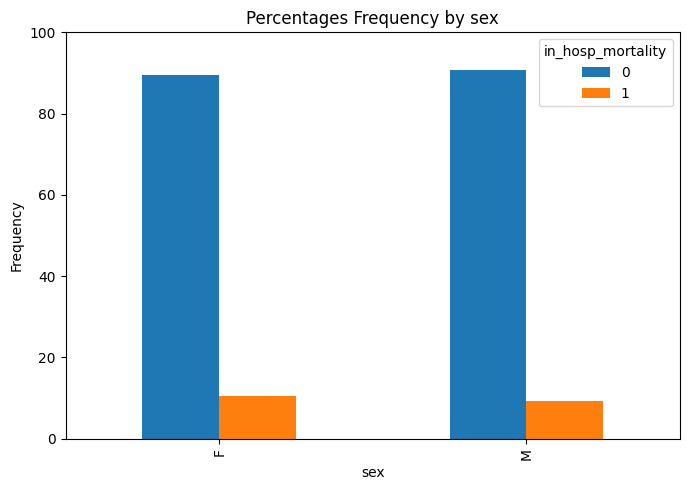

<Figure size 640x480 with 0 Axes>

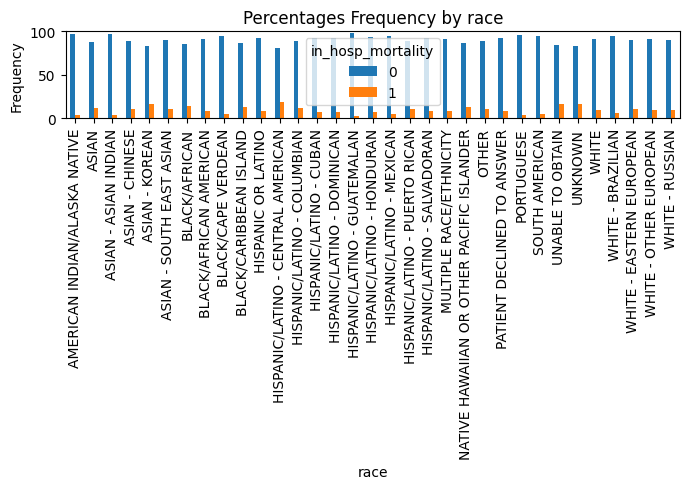

<Figure size 640x480 with 0 Axes>

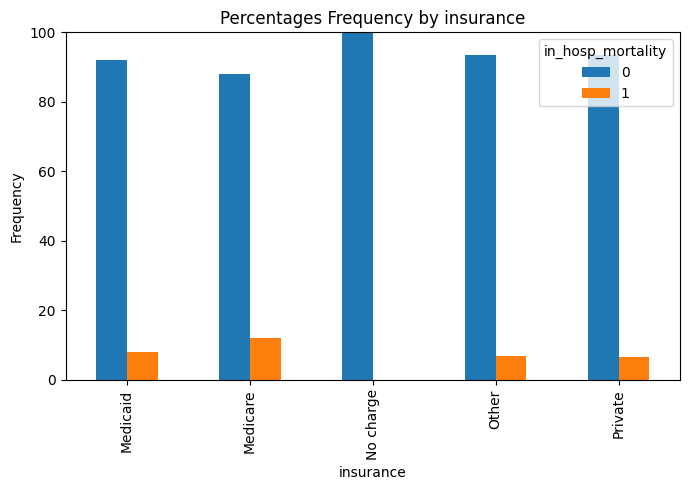

<Figure size 640x480 with 0 Axes>

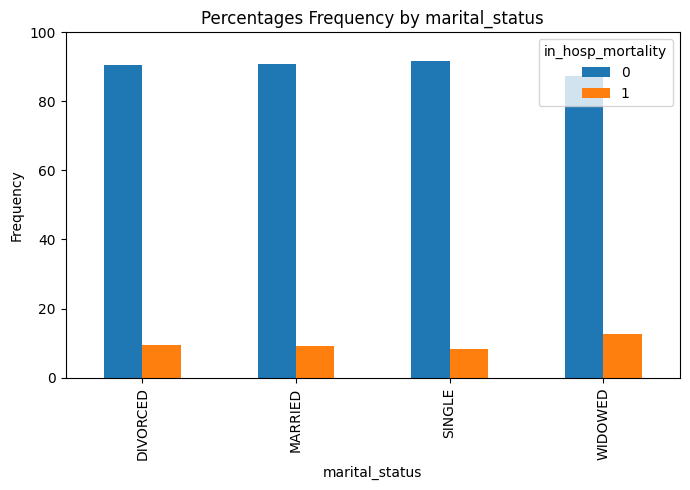

<Figure size 640x480 with 0 Axes>

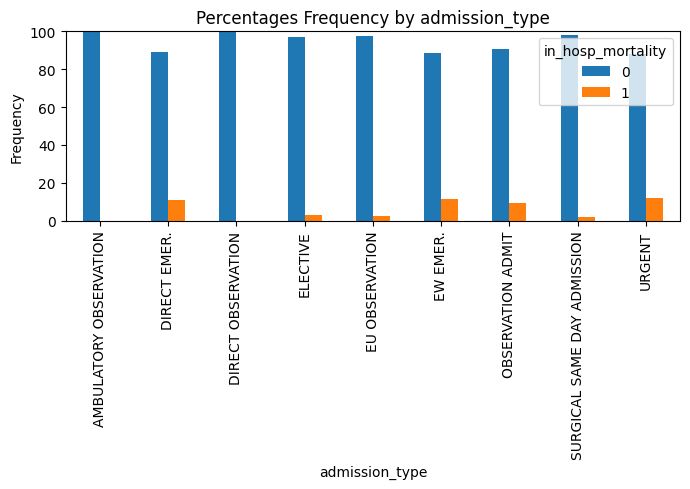

<Figure size 640x480 with 0 Axes>

In [18]:
# Create distribution for the original dataset
for col in ['sex','race','insurance','marital_status', 'admission_type']:
  freq = df_final_c.groupby([col, 'in_hosp_mortality']).size().unstack(fill_value=0)
  perc = freq.div(freq.sum(axis=1), axis=0) * 100
  ax = perc.plot(kind='bar', stacked=False, figsize=(7,5))
  plt.title(f"Percentages Frequency by {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.ylim(0,100)
  plt.legend(title='in_hosp_mortality', labels=['0', '1'])
  plt.tight_layout()
  plt.show()
  plt.savefig("graphs.jpg")


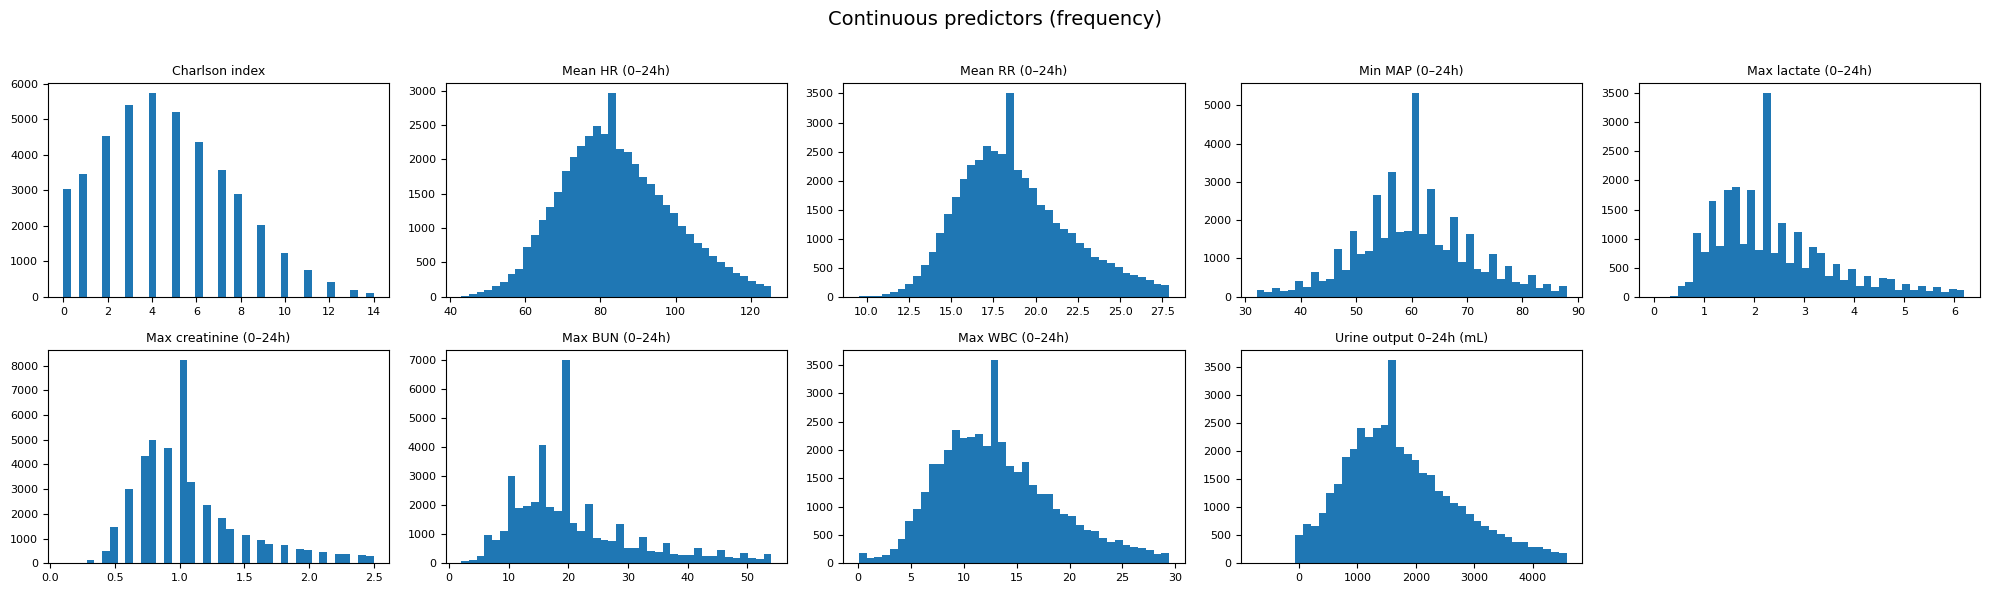

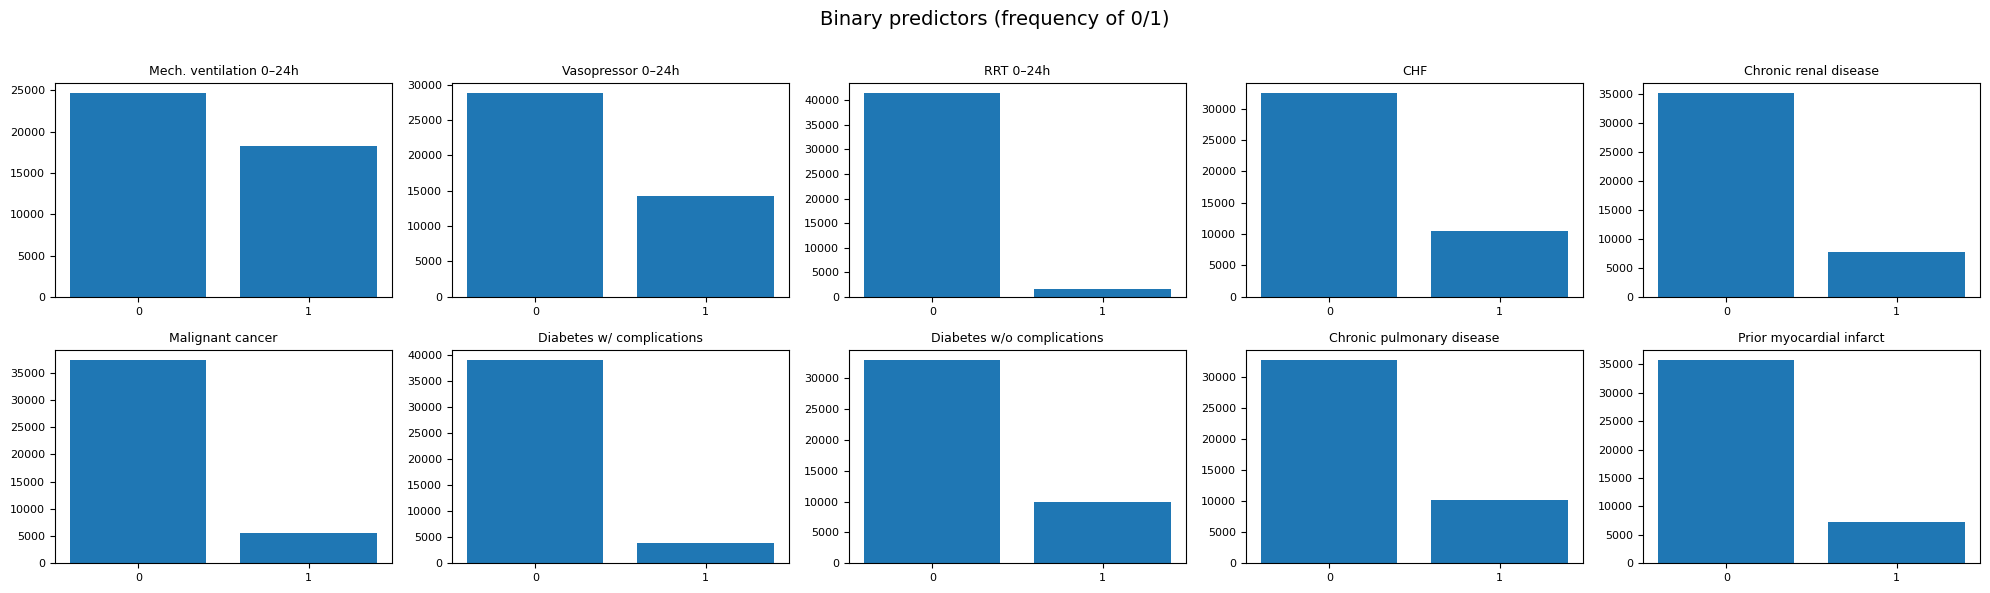

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Variable lists
# -----------------------------

continuous_top10 = [
    "charlson_comorbidity_index",
    "heart_rate_mean",
    "resp_rate_mean",
    "mbp_min",          # minimum mean arterial pressure (0–24h)
    "lactate_max",      # peak lactate (0–24h)
    "creatinine_max",   # peak creatinine (0–24h)
    "bun_max",          # peak BUN (0–24h)
    "wbc_max",          # peak WBC (0–24h)
    "urine_output_24h"  # total urine in first 24h
]

binary_top10 = [
    "mech_vent_24h",           # invasive mechanical ventilation in first 24h
    "vasopressor_24h",         # any vasopressor use in first 24h
    "rrt_24h",                 # any renal replacement therapy in first 24h
    "congestive_heart_failure",
    "renal_disease",
    "malignant_cancer",
    "diabetes_with_cc",
    "diabetes_without_cc",
    "chronic_pulmonary_disease",
    "myocardial_infarct"
]

# Optional: nicer labels for plotting
nice_labels = {
    "charlson_comorbidity_index": "Charlson index",
    "heart_rate_mean": "Mean HR (0–24h)",
    "resp_rate_mean": "Mean RR (0–24h)",
    "mbp_min": "Min MAP (0–24h)",
    "lactate_max": "Max lactate (0–24h)",
    "creatinine_max": "Max creatinine (0–24h)",
    "bun_max": "Max BUN (0–24h)",
    "wbc_max": "Max WBC (0–24h)",
    "urine_output_24h": "Urine output 0–24h (mL)",

    "mech_vent_24h": "Mech. ventilation 0–24h",
    "vasopressor_24h": "Vasopressor 0–24h",
    "rrt_24h": "RRT 0–24h",
    "congestive_heart_failure": "CHF",
    "renal_disease": "Chronic renal disease",
    "malignant_cancer": "Malignant cancer",
    "diabetes_with_cc": "Diabetes w/ complications",
    "diabetes_without_cc": "Diabetes w/o complications",
    "chronic_pulmonary_disease": "Chronic pulmonary disease",
    "myocardial_infarct": "Prior myocardial infarct",
}

# -----------------------------
# 2) Continuous variables: histograms
# -----------------------------

n_cont = len(continuous_top10)
n_cols = 5
n_rows = int(np.ceil(n_cont / n_cols))

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4 * n_cols, 3 * n_rows),
    squeeze=False
)

for i, col in enumerate(continuous_top10):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r, c]

    if col not in df_final_c.columns:
        ax.set_visible(False)
        continue

    data = df_final_c[col].dropna()

    ax.hist(data, bins=40)
    ax.set_title(nice_labels.get(col, col), fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=8)

# turn off any unused subplots
for j in range(i + 1, n_rows * n_cols):
    r = j // n_cols
    c = j % n_cols
    axes[r, c].axis("off")

fig.suptitle("Continuous predictors (frequency)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# -----------------------------
# 3) Binary variables: bar plots of 0/1 frequency
# -----------------------------

n_bin = len(binary_top10)
n_cols_b = 5
n_rows_b = int(np.ceil(n_bin / n_cols_b))

fig, axes = plt.subplots(
    n_rows_b, n_cols_b,
    figsize=(4 * n_cols_b, 3 * n_rows_b),
    squeeze=False
)

for i, col in enumerate(binary_top10):
    r = i // n_cols_b
    c = i % n_cols_b
    ax = axes[r, c]

    if col not in df_final_c.columns:
        ax.set_visible(False)
        continue

    counts = df_final_c[col].value_counts(dropna=False).sort_index()
    # ensure index labels are clear (0,1,NaN)
    idx = [str(x) for x in counts.index]

    ax.bar(idx, counts.values)
    ax.set_title(nice_labels.get(col, col), fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=8)

# turn off unused
for j in range(i + 1, n_rows_b * n_cols_b):
    r = j // n_cols_b
    c = j % n_cols_b
    axes[r, c].axis("off")

fig.suptitle("Binary predictors (frequency of 0/1)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [36]:
# Save the table and create a function to save all the data
X_train_encoded.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\X_train_df.csv')

In [37]:
X_test_encoded.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\X_test_df.csv')

In [38]:
X_val_encoded.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\X_val_df.csv')

In [39]:
y_val.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\y_val_df.csv')

In [40]:
y_train.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\y_train_df.csv')

In [41]:
y_test.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\y_test_df.csv')

In [27]:
df_test.to_csv('C:\\Users\\cecil\\Documents\\True_VerifandValid\\Data\\Processed\\df_test.csv')